<a href="https://colab.research.google.com/github/Sohammhatre10/MOSCharacteristics/blob/main/MOSFETCharacteristics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!unzip moschar.zip

Archive:  moschar.zip
replace training_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace val01.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace val02.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace val03.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace val04.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace val05.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace val06.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [6]:
import pandas as pd

train_data = pd.read_csv("training_data.csv")

train_data

,Vds,Vgs,Id
0,0.00,0.0,0.000000e+00
1,0.02,0.0,2.770000e-14
2,0.04,0.0,4.790000e-14
3,0.06,0.0,6.900000e-14
4,0.08,0.0,8.950000e-14
...,...,...,...
25346,4.92,5.0,1.430000e-04
25347,4.94,5.0,1.430000e-04
25348,4.96,5.0,1.430000e-04
25349,4.98,5.0,1.430000e-04


In [7]:
val01 = pd.read_csv('val01.csv')
val01
df = train_data

In [8]:
df["Id"].replace({0:1e-13}, inplace=True)
df["Vgs"].replace({0:1e-3}, inplace=True)
df["Vds"].replace({0:1e-3}, inplace=True)

In [32]:
df['Id']

0        1.000000e-13
1        2.770000e-14
2        4.790000e-14
3        6.900000e-14
4        8.950000e-14
             ...     
25346    1.430000e-04
25347    1.430000e-04
25348    1.430000e-04
25349    1.430000e-04
25350    1.440000e-04
Name: Id, Length: 25351, dtype: float64

In [9]:
id=df["Id"]
Vgs=df["Vgs"]
Vds=df["Vds"]

In [10]:
import numpy as np
yy=np.ravel(id)
X1=df.iloc[:,0:2]
X=np.log10(X1)
X

,Vds,Vgs
0,-3.000000,-3.00000
1,-1.698970,-3.00000
2,-1.397940,-3.00000
3,-1.221849,-3.00000
4,-1.096910,-3.00000
...,...,...
25346,0.691965,0.69897
25347,0.693727,0.69897
25348,0.695482,0.69897
25349,0.697229,0.69897


In [11]:
from sklearn.model_selection import train_test_split
y = np.log10(yy)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [12]:
import tensorflow as tf
from tensorflow.keras.callbacks import LearningRateScheduler
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='tanh'),
    tf.keras.layers.Dense(3, activation='tanh'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mse']
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-6*10**(epochs/5))

history = model.fit(X_train, y_train, epochs=40, callbacks=lr_scheduler, validation_data=(X_test, y_test))

# pd.DataFrame(history).plot()

Epoch 1/40
634/634 [==============================] - 5s 4ms/step - loss: 7.6445 - mse: 69.8684 - val_loss: 7.6152 - val_mse: 69.4221 - lr: 1.0000e-06
Epoch 2/40
634/634 [==============================] - 2s 3ms/step - loss: 7.6352 - mse: 69.7402 - val_loss: 7.6039 - val_mse: 69.2666 - lr: 1.5849e-06
Epoch 3/40
634/634 [==============================] - 3s 4ms/step - loss: 7.6207 - mse: 69.5379 - val_loss: 7.5861 - val_mse: 69.0214 - lr: 2.5119e-06
Epoch 4/40
634/634 [==============================] - 2s 3ms/step - loss: 7.5976 - mse: 69.2197 - val_loss: 7.5579 - val_mse: 68.6357 - lr: 3.9811e-06
Epoch 5/40
634/634 [==============================] - 2s 3ms/step - loss: 7.5614 - mse: 68.7214 - val_loss: 7.5136 - val_mse: 68.0334 - lr: 6.3096e-06
Epoch 6/40
634/634 [==============================] - 2s 3ms/step - loss: 7.5044 - mse: 67.9439 - val_loss: 7.4441 - val_mse: 67.0984 - lr: 1.0000e-05
Epoch 7/40
634/634 [==============================] - 2s 3ms/step - loss: 7.4156 - mse: 66.749

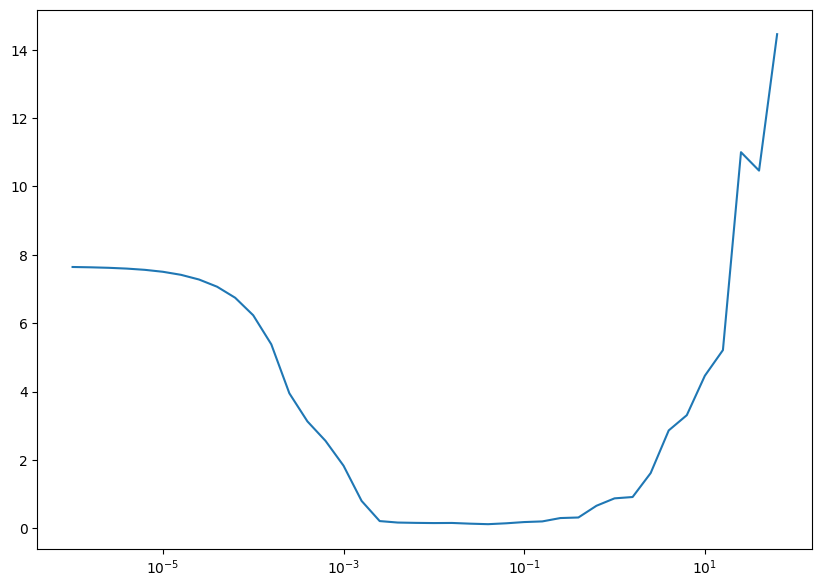

In [13]:
import matplotlib.pyplot as plt
lrs = 1e-6*(10**(tf.range(40)/5))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history['loss'])

In [14]:
model_mos = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='tanh'),
    tf.keras.layers.Dense(3, activation='tanh'),
    tf.keras.layers.Dense(1)
])

model_mos.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0158),
    metrics=['mse']
)

model_mos.fit(X_train, y_train, epochs=100)

Epoch 1/100
634/634 [==============================] - 3s 3ms/step - loss: 1.6010 - mse: 8.5918
Epoch 2/100
634/634 [==============================] - 2s 3ms/step - loss: 0.1598 - mse: 0.2070
Epoch 3/100
634/634 [==============================] - 2s 4ms/step - loss: 0.1576 - mse: 0.2110
Epoch 4/100
634/634 [==============================] - 2s 3ms/step - loss: 0.1526 - mse: 0.2086
Epoch 5/100
634/634 [==============================] - 2s 3ms/step - loss: 0.1144 - mse: 0.1834
Epoch 6/100
634/634 [==============================] - 2s 3ms/step - loss: 0.0863 - mse: 0.1342
Epoch 7/100
634/634 [==============================] - 2s 3ms/step - loss: 0.0756 - mse: 0.1074
Epoch 8/100
634/634 [==============================] - 2s 3ms/step - loss: 0.0704 - mse: 0.1044
Epoch 9/100
634/634 [==============================] - 2s 4ms/step - loss: 0.0703 - mse: 0.1054
Epoch 10/100
634/634 [==============================] - 2s 3ms/step - loss: 0.0677 - mse: 0.1075
Epoch 11/100
634/634 [=================

In [15]:
model_mos.evaluate(X_test, y_test)

159/159 [==============================] - 0s 2ms/step - loss: 0.0418 - mse: 0.0052


[0.041840169578790665, 0.005182572174817324]

In [16]:
pred_mos = model_mos.predict(X_test)
df_pred_mos = pd.DataFrame({'Predicted': pred_mos.flatten(), 'Actual': y_test.flatten()})

159/159 [==============================] - 0s 1ms/step


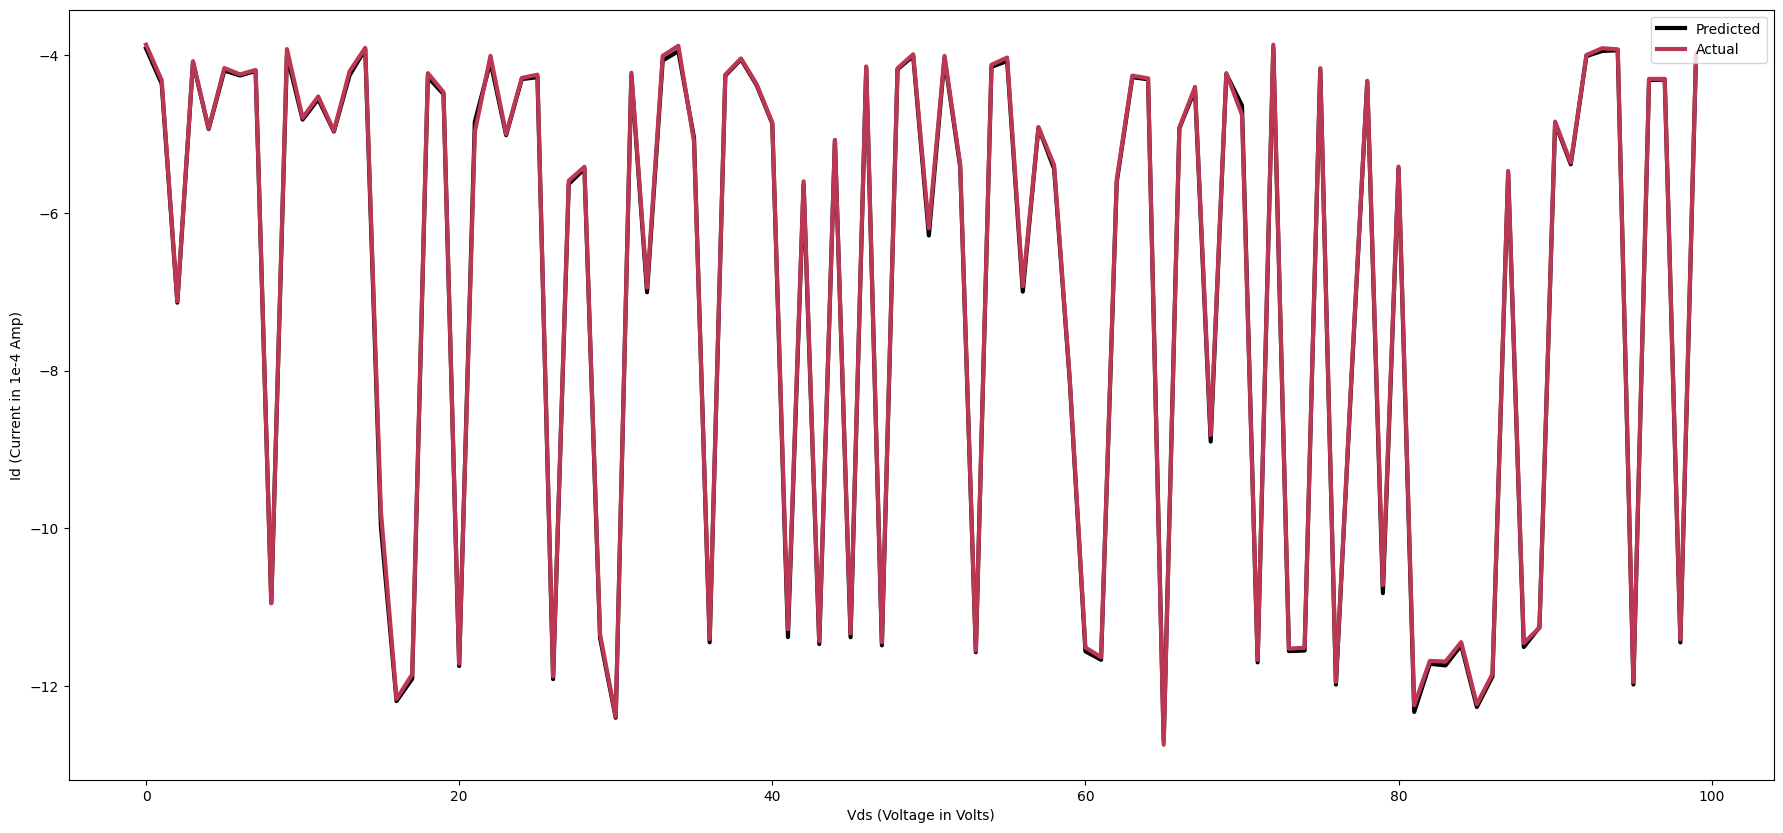

In [33]:
import matplotlib.pyplot as plt
import numpy as np
df_pred_mos = df_pred_mos[:100]
cmap = plt.get_cmap('inferno')
num_cols = len(df_pred_mos.columns)

plt.figure(figsize=(22, 10))
for i, column in enumerate(df_pred_mos.columns):
    color = cmap(i / num_cols)
    df_pred_mos[column].plot(label=column, color=color, linewidth=3)
plt.legend(loc='upper right')
plt.xlabel('Vds (Voltage in Volts)')
plt.ylabel('Id (Current in 1e-4 Amp)')
plt.show()